In [25]:
import torch
import numpy as np 
from torch.autograd import Variable
import torch.nn.functional as fun
import matplotlib.pyplot as plt

In [26]:
#fake data
n_data=torch.ones(100,2)
x0=torch.normal(2*n_data,1)
y0=torch.zeros(100)
x1=torch.normal(-2*n_data,1)
y1=torch.ones(100)
x=torch.cat((x0,x1),0).type(torch.FloatTensor)
y=torch.cat((y0,y1),).type(torch.LongTensor)

In [27]:
#转化为variable
x,y=Variable(x),Variable(y)

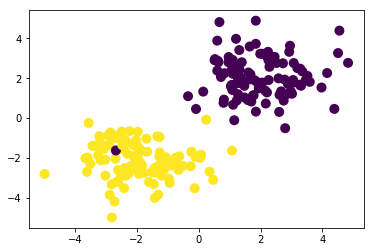

In [28]:
plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0)
plt.show()

In [29]:
#神经网络定义
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(n_feature,n_hidden)
        self.classfication=torch.nn.Linear(n_hidden,n_output)
    def forward(self,x):
        x=torch.relu(self.hidden(x))
        x=self.classfication(x)
        return x

In [30]:
#网络构建
net=Net(2,10,2)
print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (classfication): Linear(in_features=10, out_features=2, bias=True)
)


In [31]:
#优化策略与损失函数
optimizer=torch.optim.SGD(net.parameters(),lr=0.02)
lossfunc=torch.nn.CrossEntropyLoss()

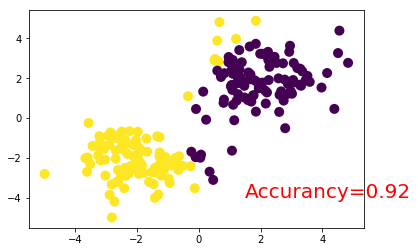

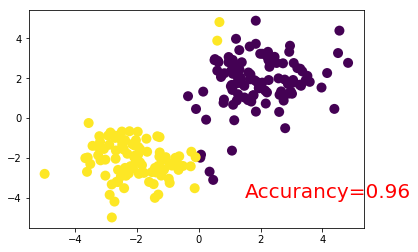

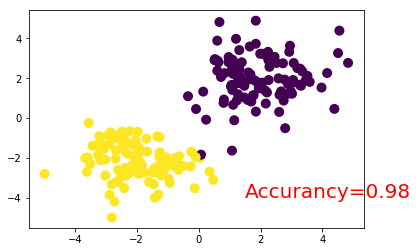

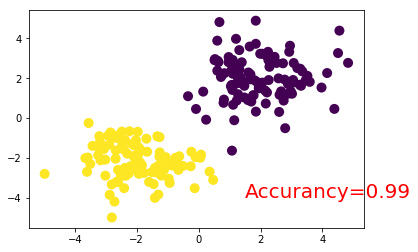

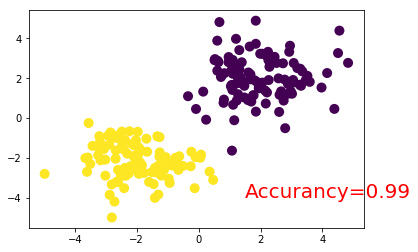

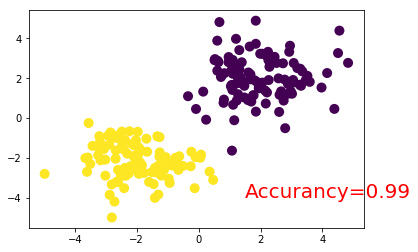

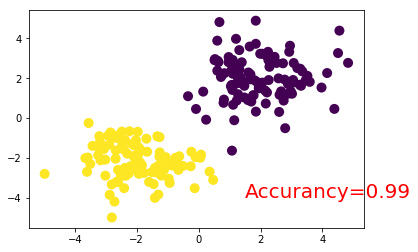

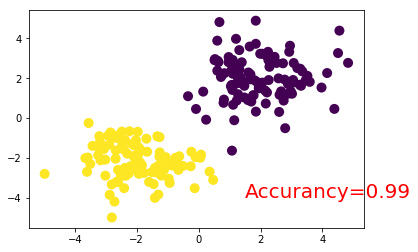

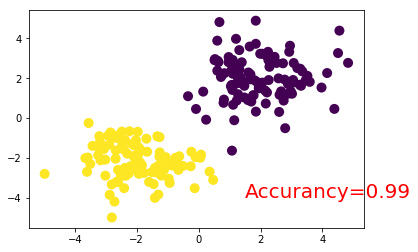

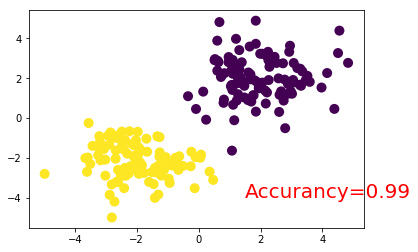

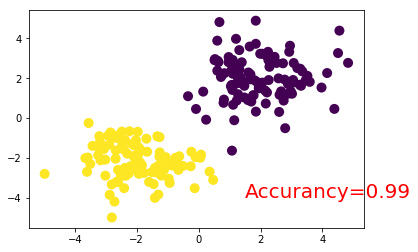

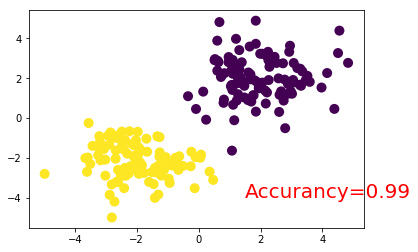

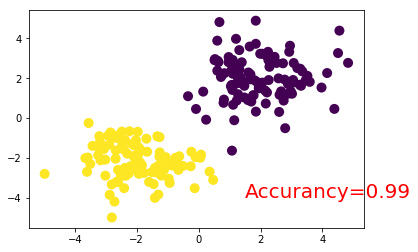

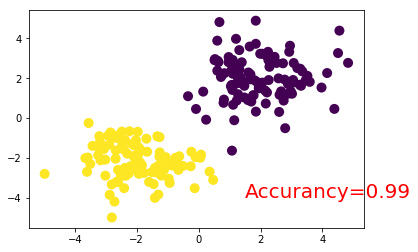

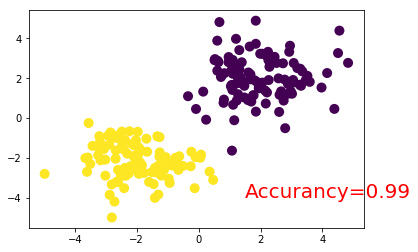

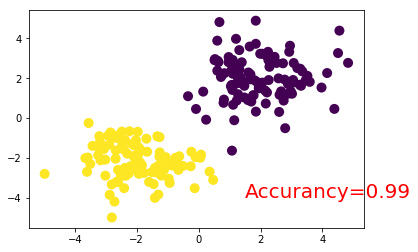

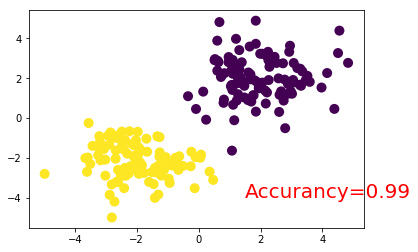

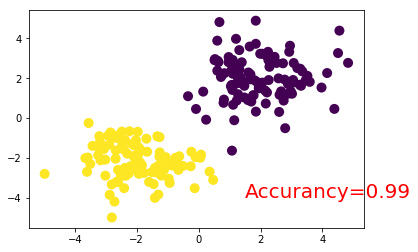

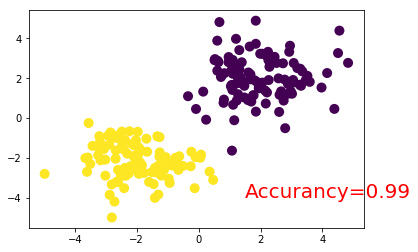

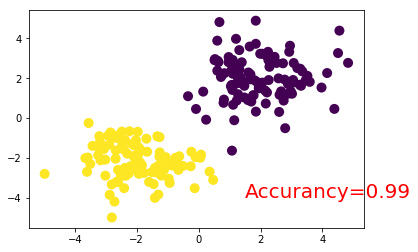

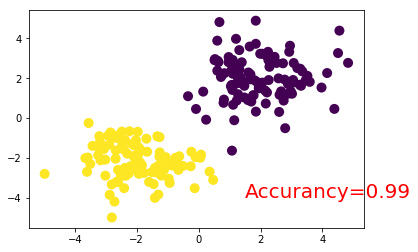

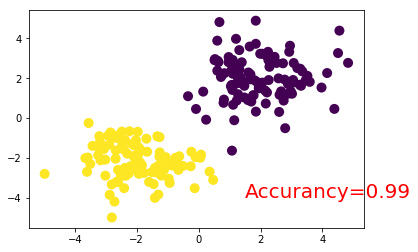

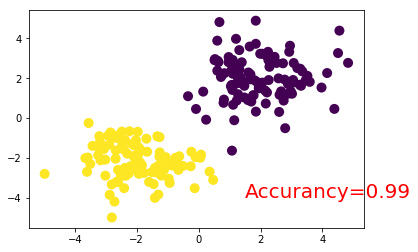

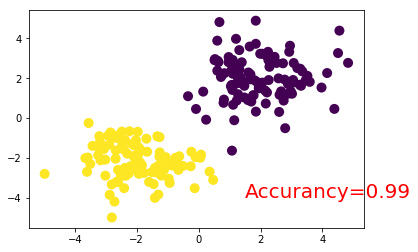

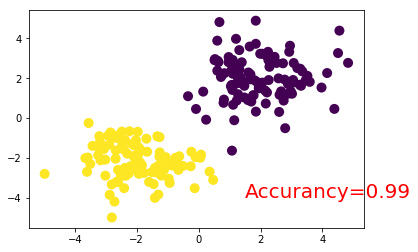

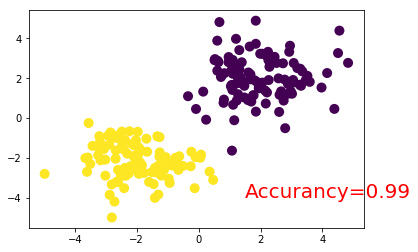

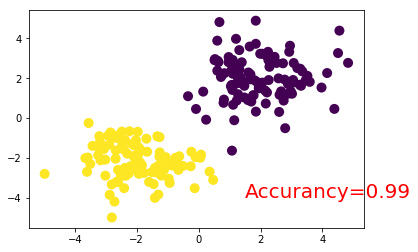

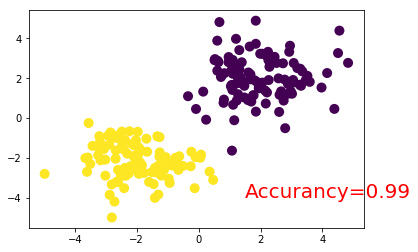

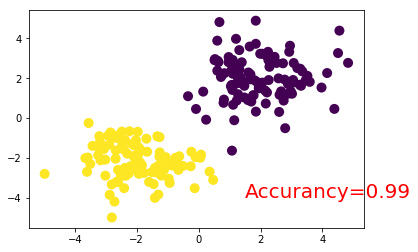

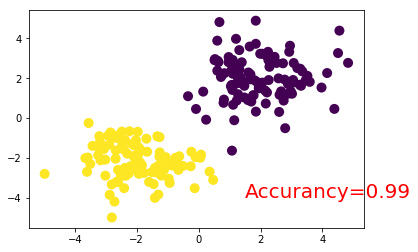

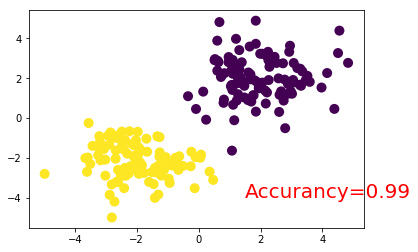

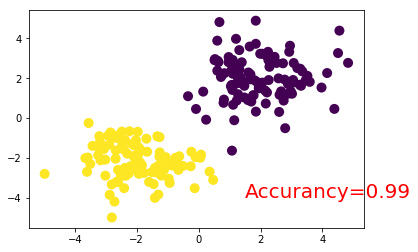

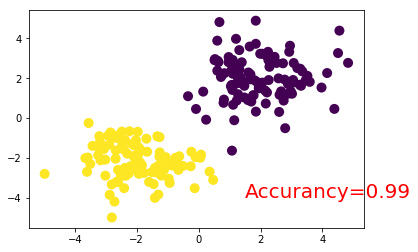

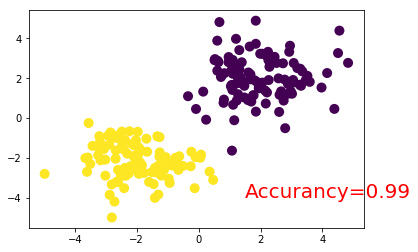

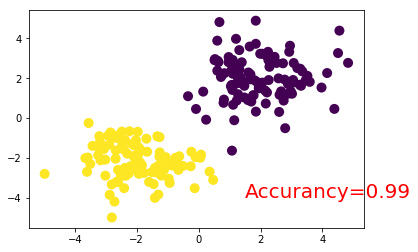

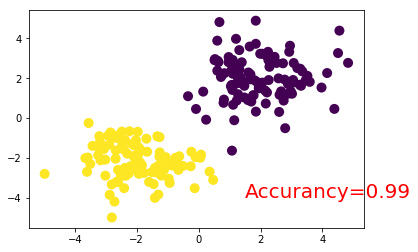

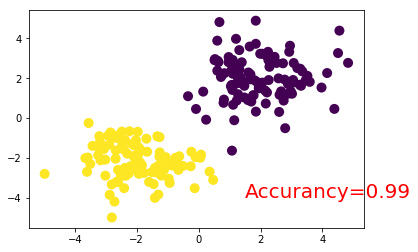

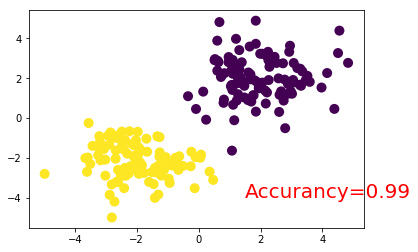

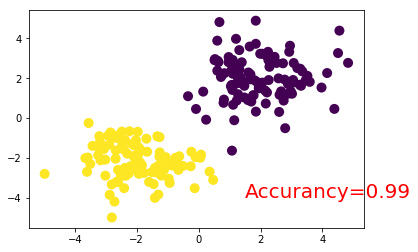

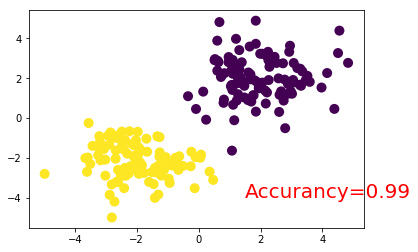

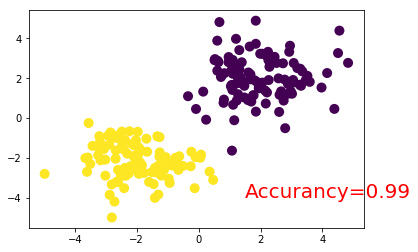

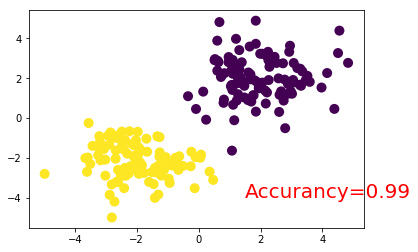

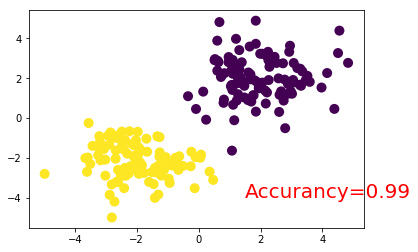

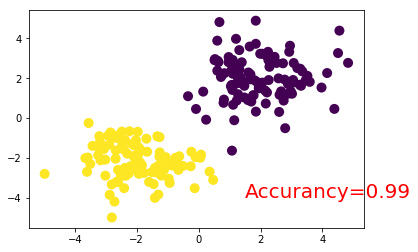

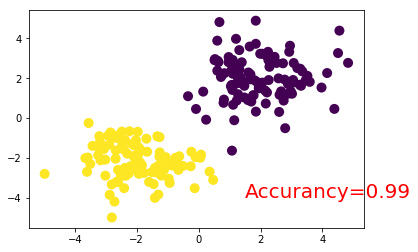

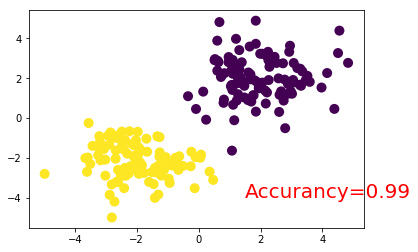

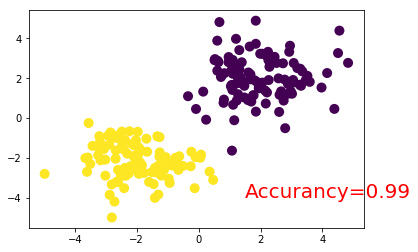

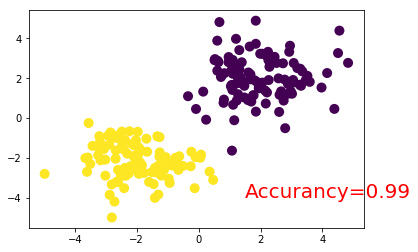

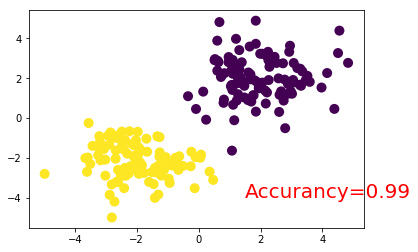

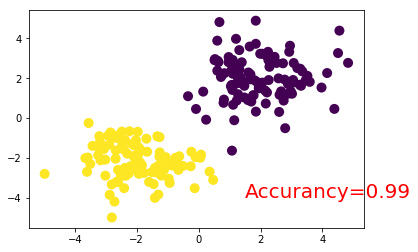

In [32]:
#训练
for i in range(100):
    output=net(x)
    optimizer.zero_grad()
    #优化
    loss=lossfunc(output,y)
    loss.backward()
    optimizer.step()
    #画图
    if i%2==0:
        plt.cla()
        prediction=torch.max(torch.softmax(output,dim=1),1)[1]
        pred_y=prediction.data.numpy().squeeze()
        target_y=y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y,s=100,lw=0)
        accurancy=sum(pred_y==target_y)/200
        plt.text(1.5,-4,'Accurancy=%.2f'%accurancy,fontdict={'size':20,'color':'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()